# 1-4

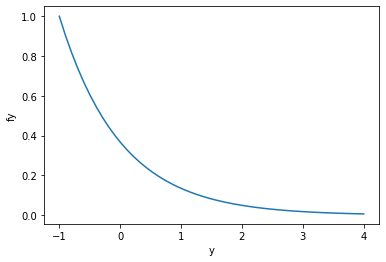

In [261]:
import matplotlib.pyplot as plt
import numpy as np
import math
def functiony(n):
    y = np.linspace(-math.sqrt(n),4,50,dtype=float)
    fyval = []
    for i in range(len(y)):
        fy = (n**(n-0.5))/(float(math.factorial(n-1)))*(1+y[i]/math.sqrt(n))**(n-1)*math.exp(-n*(1+(y[i]/math.sqrt(n))))
        fyval.append(fy)
    plt.plot(y,fyval)
    plt.xlabel('y')
    plt.ylabel('fy')
    plt.show()
    return
functiony(1)


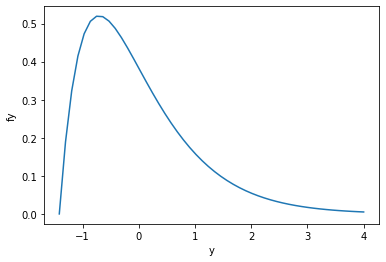

In [316]:
functiony(2)

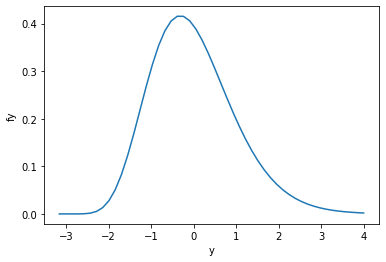

In [315]:
functiony(10)

# 2-1

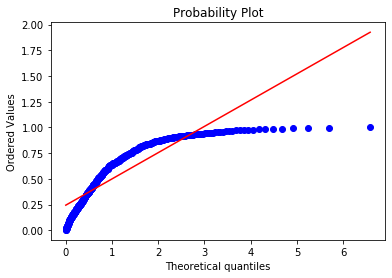

In [266]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import pylab
import scipy.stats as stats


myData = []

for _ in range(500):
    myData.append(np.random.uniform(0,1));

stats.probplot(myData, dist="expon", plot=pylab);
pylab.show();

Observed data shows that the plot curves downward as it travels to the right, meaning that it has a lighter right tail than the hypothesized distribution which is the exponential distribution in this case.

# 2-2

Observed data fails to exhibit patterns of normality because even though it has large number of samples, lots of points of the sample do not show the characteristic of the hypothesized distribution, and fall out of the normal line.

# Read Data

In [273]:
import pandas as pd

data = pd.read_csv("data2.csv")
list(data.columns)

['year x']

In [274]:
newdata = data['year x'].str.split(" ", n = 1,expand = True)
newdata.columns=['year','x']
newdata['x'] = newdata['x'].str.replace(",","")
newdata['x'] = newdata['x'].astype(float)
newdata['year'] = newdata['year'].astype(int)
newdata.index = newdata.index+1

In [275]:
newdata.head()

,year,x
1,1990,7898639.0
2,1991,7487232.0
3,1991,7389404.0
4,1988,6924749.0
5,1993,6685249.0


# 2-3

Text(0.5, 1.0, 'exponential')

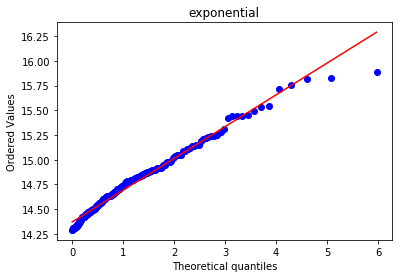

In [313]:
sortdata = newdata.sort_values(by=['x'],ascending=False)
sorteddata = newdata.loc[1:270]
sorteddata = sorteddata.reindex(columns = ['year','x','log'])       
sorteddata['log'] = np.log(sorteddata['x'])

import scipy.stats as stats
import matplotlib.pyplot as plt
stats.probplot(sorteddata['log'],dist = "expon", plot=plt);
plt.title('exponential')

Text(0.5, 1.0, 'normal')

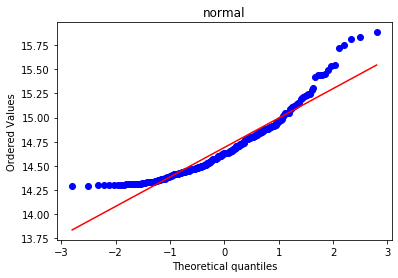

In [314]:
stats.probplot(sorteddata['log'],dist = "norm", plot=plt);
plt.title('normal')

The data fits pareto distribution because log transformation fits the line of exponential distribution. 

# 3-3

In [319]:
def estimator1(num):
    est = 0 
    for i in newdata['x'].index:
        est = est + max((newdata['x'][i]-num),0)
    estdiv = est/371
    print("estimated value for %s " %str(num) + "is %s" %str(estdiv))
    return


In [320]:
print(estimator1(3000000))
print(estimator1(3500000))
print(estimator1(4000000))
print(estimator1(5000000))
print(estimator1(7500000))

estimated value for 3000000 is 161728.1051212938
None
estimated value for 3500000 is 108837.2345013477
None
estimated value for 4000000 is 74696.3396226415
None
estimated value for 5000000 is 35888.03504043127
None
estimated value for 7500000 is 1074.4986522911051
None


# 3-5

In [333]:
import numpy as np
n = len(newdata.index)
k = 95
j = n-k+1
sumgam = 0
for i in range(j,n):
    sumgam = sumgam + (np.log(newdata['x'][i])-np.log(newdata['x'][n-k]))
gammahat = ((1/k)*(sumgam))
print(gammahat)
def estimator3(num):
    val = (num/(((1/gammahat)-1))*(k/n)*(num/newdata['x'][n-k])**(-1/gammahat))
    print("estimator value for %s "%str(num)+"is %s" %str(val))
    return 

-0.12934736737846256


In [334]:
print(estimator3(3000000))
print(estimator3(3500000))
print(estimator3(4000000))
print(estimator3(5000000))
print(estimator3(7500000))

estimator value for 3000000 is -12334574.02439179
None
estimator value for 3500000 is -47385405.319350176
None
estimator value for 4000000 is -152047484.47278565
None
estimator value for 5000000 is -1066871658.047523
None
estimator value for 7500000 is -36777827043.57625
None
